In [1]:
from vadetisweb.anomaly_algorithms.detection.cluster import cluster_gaussian_mixture
from vadetisweb.anomaly_algorithms.detection.histogram import histogram
from vadetisweb.anomaly_algorithms.detection.svm import svm
from vadetisweb.anomaly_algorithms.detection.isolation_forest import isolation_forest
from vadetisweb.anomaly_algorithms.detection.lisa import lisa_pearson, lisa_dtw, lisa_geo
from vadetisweb.anomaly_algorithms.detection.robust_pca import robust_pca_huber_loss
from vadetisweb.models import DataSet, TimeSeries

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [3]:
#input
def get_dataset(title, ts_name=None):
    ts_id = None
    dataset = DataSet.objects.filter(title=title).first()
    training_dataset = dataset.training_dataset.all().first()
    if ts_name is not None:
        ts_id = dataset.timeseries_set.all().filter(name=ts_name).first().id

    return dataset, training_dataset, ts_id

In [4]:
def lisa_pearson_detection_time_it(df, df_class, time_series_id, maximize_score='F1-Score', window_size=10):
    result = %timeit -o lisa_pearson(df, df_class, time_series_id, maximize_score=maximize_score, window_size=window_size)
    return result

In [5]:
def lisa_dtw_detection_time_it(df, df_class, time_series_id, maximize_score='F1-Score', window_size=10):
    result = %timeit -o lisa_dtw(df, df_class, time_series_id, maximize_score=maximize_score, window_size=window_size, distance_function='euclidean')
    return result

In [6]:
def lisa_geo_detection_time_it(df, df_class, time_series_id, maximize_score='F1-Score'):
    result = %timeit -o lisa_geo(df, df_class, time_series_id, maximize_score=maximize_score)
    return result

In [7]:
def rpca_detection_time_it(df, df_class, df_train, df_train_class, delta=1, n_components=2, maximize_score='F1-Score', train_size=0.5):
    result = %timeit -o robust_pca_huber_loss(df, df_class, df_train, df_train_class, delta=delta, n_components=n_components, maximize_score=maximize_score, train_size=train_size)
    return result

In [8]:
def histogram_detection_time_it(df, df_class, df_train, df_train_class, maximize_score='F1-Score', train_size=0.5):
    result = %timeit -o histogram(df, df_class, df_train, df_train_class, maximize_score=maximize_score, train_size=train_size)
    return result

In [9]:
def cluster_detection_time_it(df, df_class, df_train, df_train_class, maximize_score='F1-Score', n_components=3, n_init=3, train_size=0.5):
    result = %timeit -o cluster_gaussian_mixture(df, df_class, df_train, df_train_class, maximize_score=maximize_score, n_components=n_components, n_init=n_init, train_size=train_size)
    return result

In [10]:
def svm_detection_time_it(df, df_class, df_train, df_train_class, maximize_score='F1-Score', nu=0.95, kernel='rbf', train_size=0.5):
    result = %timeit -o svm(df, df_class, df_train, df_train_class, maximize_score=maximize_score, nu=nu, kernel=kernel, train_size=train_size)
    return result

In [11]:
def isolation_forest_detection_time_it(df, df_class, df_train, df_train_class, maximize_score='F1-Score', n_jobs=-1, bootstrap=False, n_estimators=40, train_size=0.5):
    result = %timeit -o isolation_forest(df, df_class, df_train, df_train_class, maximize_score=maximize_score, n_jobs=n_jobs, bootstrap=bootstrap, n_estimators=n_estimators, train_size=train_size)
    return result

In [2]:
# Hum1 Single - TS LENGTH
dataset_name = 'Humidity'
ts_name = 'LUZ'
dimensions = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500]

In [13]:
# TIME TS LENGTH - Pearson
dataset, _, ts_id = get_dataset(dataset_name, ts_name)
lisa_pearson_results = []
for l in dimensions:
    df = dataset.dataframe[0:l]
    df_class = dataset.dataframe_class[0:l]
    
    r = lisa_pearson_detection_time_it(df, df_class, ts_id)
    lisa_pearson_results.append(np.round(np.average(r.all_runs), 2))

1.26 s ± 28 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
1.4 s ± 30.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
1.56 s ± 29.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
1.7 s ± 38.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
1.94 s ± 39.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.06 s ± 34.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.21 s ± 1.78 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.4 s ± 32.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.54 s ± 48 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.65 s ± 1.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.82 s ± 972 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.99 s ± 2.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
3.22 s ± 95 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
3.47 s ± 74.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
3.56 s ± 1.58 ms per loop (mean ± std. dev. of 7 runs, 1 loo

In [14]:
# TIME TS LENGTH - DTW
dataset, _, ts_id = get_dataset(dataset_name, ts_name)
lisa_dtw_results = []
for l in dimensions:
    df = dataset.dataframe[0:l]
    df_class = dataset.dataframe_class[0:l]
    
    r = lisa_dtw_detection_time_it(df, df_class, ts_id)
    lisa_dtw_results.append(np.round(np.average(r.all_runs), 2))

1.72 s ± 46.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.54 s ± 48 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
3.23 s ± 67.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
3.98 s ± 98.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
4.61 s ± 95.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
5.51 s ± 109 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
6.17 s ± 68.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
6.78 s ± 15.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
7.56 s ± 139 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
8.67 s ± 105 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
9.16 s ± 167 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
9.99 s ± 158 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
10.7 s ± 234 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
11.6 s ± 141 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
12.2 s ± 180 ms per loop (mean ± std. dev. of 7 runs, 1 l

In [15]:
# TIME TS LENGTH - LISA VANILLA
dataset, _, ts_id = get_dataset(dataset_name, ts_name)
lisa_geo_results = []
for l in dimensions:
    df = dataset.dataframe[0:l]
    df_class = dataset.dataframe_class[0:l]
    
    r = lisa_geo_detection_time_it(df, df_class, ts_id)
    lisa_geo_results.append(np.round(np.average(r.all_runs), 2))

1.42 s ± 14 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
1.57 s ± 12.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
1.74 s ± 2.59 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
1.92 s ± 8.43 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.11 s ± 16.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.3 s ± 18.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.45 s ± 35.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.62 s ± 23.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.82 s ± 16.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.96 s ± 16.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
3.1 s ± 23.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
3.34 s ± 34.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
3.53 s ± 10.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
3.68 s ± 36.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
3.85 s ± 34.9 ms per loop (mean ± std. dev. of 7 run

In [16]:
# TIME TS LENGTH - RPCA
dataset, training_dataset, _ = get_dataset(dataset_name)
rpca_results = []
for l in dimensions:
    df = dataset.dataframe[0:l]
    df_class = dataset.dataframe_class[0:l]
    
    r = rpca_detection_time_it(df, df_class, training_dataset.dataframe, training_dataset.dataframe_class)
    rpca_results.append(np.round(np.average(r.all_runs), 2))

2.56 s ± 108 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.64 s ± 73.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.66 s ± 126 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.65 s ± 71.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.63 s ± 63 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.8 s ± 92 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.8 s ± 62.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.74 s ± 28 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.85 s ± 41.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.95 s ± 36.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.96 s ± 85.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.98 s ± 70.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.98 s ± 89.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.93 s ± 59.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
3.1 s ± 137 ms per loop (mean ± std. dev. of 7 runs, 1 loo

In [17]:
# TIME TS LENGTH - HISTOGRAM
dataset, training_dataset, _ = get_dataset(dataset_name)
histogram_results = []
for l in dimensions:
    df = dataset.dataframe[0:l]
    df_class = dataset.dataframe_class[0:l]
    
    r = histogram_detection_time_it(df, df_class, training_dataset.dataframe, training_dataset.dataframe_class)
    histogram_results.append(np.round(np.average(r.all_runs), 2))

2.52 s ± 73.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.54 s ± 61.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.62 s ± 54.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.64 s ± 46.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.76 s ± 21.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.75 s ± 51.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.75 s ± 40.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.86 s ± 72.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.83 s ± 68.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.93 s ± 54.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.96 s ± 76 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.98 s ± 64.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
3.01 s ± 65.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
3.04 s ± 74.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
3.04 s ± 74.9 ms per loop (mean ± std. dev. of 7 r

In [18]:
# TIME TS LENGTH - CLUSTER
dataset, training_dataset, _ = get_dataset(dataset_name)
cluster_results = []
for l in dimensions:
    df = dataset.dataframe[0:l]
    df_class = dataset.dataframe_class[0:l]
    
    r = cluster_detection_time_it(df, df_class, training_dataset.dataframe, training_dataset.dataframe_class)
    cluster_results.append(np.round(np.average(r.all_runs), 2))

2.58 s ± 70.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.66 s ± 42.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.63 s ± 59.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.67 s ± 71.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.68 s ± 67.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.78 s ± 47.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.67 s ± 5.54 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.8 s ± 63.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.86 s ± 75.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.84 s ± 55.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.86 s ± 54 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.99 s ± 93.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.99 s ± 91.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
3.05 s ± 78.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
3.11 s ± 52.2 ms per loop (mean ± std. dev. of 7 ru

In [19]:
# TIME TS LENGTH - SVM
dataset, training_dataset, _ = get_dataset(dataset_name)
svm_results = []
for l in dimensions:
    df = dataset.dataframe[0:l]
    df_class = dataset.dataframe_class[0:l]
    
    r = svm_detection_time_it(df, df_class, training_dataset.dataframe, training_dataset.dataframe_class)
    svm_results.append(np.round(np.average(r.all_runs), 2))

2.42 s ± 79 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.51 s ± 54.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.46 s ± 1.14 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.59 s ± 46.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.54 s ± 3.49 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.72 s ± 70.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.76 s ± 29.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.67 s ± 32.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.78 s ± 88.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.88 s ± 54.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.86 s ± 79.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.95 s ± 81.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.94 s ± 65 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
3.05 s ± 85.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.99 s ± 4.53 ms per loop (mean ± std. dev. of 7 run

In [20]:
# TIME TS LENGTH - ISOLATION FOREST
dataset, training_dataset, _ = get_dataset(dataset_name)
isolation_results = []
for l in dimensions:
    df = dataset.dataframe[0:l]
    df_class = dataset.dataframe_class[0:l]
    
    r = isolation_forest_detection_time_it(df, df_class, training_dataset.dataframe, training_dataset.dataframe_class)
    isolation_results.append(np.round(np.average(r.all_runs), 2))

2.76 s ± 39.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.84 s ± 23.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.87 s ± 28.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.91 s ± 24 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.94 s ± 28.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.99 s ± 34.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
3.04 s ± 29.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
3.06 s ± 29.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
3.08 s ± 64 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
3.12 s ± 42.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
3.19 s ± 19.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
3.23 s ± 37.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
3.27 s ± 21.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
3.3 s ± 38.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
3.39 s ± 54.4 ms per loop (mean ± std. dev. of 7 runs

In [22]:
scores = [{ 'title' : 'LISA (Pearson)', 'scores' : lisa_pearson_results }, 
          { 'title' : 'LISA (DTW)', 'scores' : lisa_dtw_results }, 
          { 'title' : 'LISA (Vanilla)', 'scores' :  lisa_geo_results }, 
          { 'title' : 'RPCA', 'scores' :  rpca_results }, 
          { 'title' : 'Histogram', 'scores' :  histogram_results }, 
          { 'title' : 'Cluster', 'scores' :  cluster_results }, 
          { 'title' : 'SVM', 'scores' :  svm_results }, 
          { 'title' : 'Isolation Forest', 'scores' :  isolation_results }
         ]

In [23]:
print(scores)

[{'title': 'LISA (Pearson)', 'scores': [1.26, 1.4, 1.56, 1.7, 1.94, 2.06, 2.21, 2.4, 2.54, 2.65, 2.82, 2.99, 3.22, 3.47, 3.56]}, {'title': 'LISA (DTW)', 'scores': [1.72, 2.54, 3.23, 3.98, 4.61, 5.51, 6.17, 6.78, 7.56, 8.67, 9.16, 9.99, 10.74, 11.61, 12.19]}, {'title': 'LISA (Vanilla)', 'scores': [1.42, 1.57, 1.74, 1.92, 2.11, 2.3, 2.45, 2.62, 2.82, 2.96, 3.1, 3.34, 3.53, 3.68, 3.85]}, {'title': 'RPCA', 'scores': [2.56, 2.64, 2.66, 2.65, 2.63, 2.8, 2.8, 2.74, 2.85, 2.95, 2.96, 2.98, 2.98, 2.93, 3.1]}, {'title': 'Histogram', 'scores': [2.52, 2.54, 2.62, 2.64, 2.76, 2.75, 2.75, 2.86, 2.83, 2.93, 2.96, 2.98, 3.01, 3.04, 3.04]}, {'title': 'Cluster', 'scores': [2.58, 2.66, 2.63, 2.67, 2.68, 2.78, 2.67, 2.8, 2.86, 2.84, 2.86, 2.99, 2.99, 3.05, 3.11]}, {'title': 'SVM', 'scores': [2.42, 2.51, 2.46, 2.59, 2.54, 2.72, 2.76, 2.67, 2.78, 2.88, 2.86, 2.95, 2.94, 3.05, 2.99]}, {'title': 'Isolation Forest', 'scores': [2.76, 2.84, 2.87, 2.91, 2.94, 2.99, 3.04, 3.06, 3.08, 3.12, 3.19, 3.23, 3.27, 3.3, 3

In [3]:
scores = [{'title': 'LISA (Pearson)', 'scores': [1.26, 1.4, 1.56, 1.7, 1.94, 2.06, 2.21, 2.4, 2.54, 2.65, 2.82, 2.99, 3.22, 3.47, 3.56]}, {'title': 'LISA (DTW)', 'scores': [1.72, 2.54, 3.23, 3.98, 4.61, 5.51, 6.17, 6.78, 7.56, 8.67, 9.16, 9.99, 10.74, 11.61, 12.19]}, {'title': 'LISA (Vanilla)', 'scores': [1.42, 1.57, 1.74, 1.92, 2.11, 2.3, 2.45, 2.62, 2.82, 2.96, 3.1, 3.34, 3.53, 3.68, 3.85]}, {'title': 'RPCA', 'scores': [2.56, 2.64, 2.66, 2.65, 2.63, 2.8, 2.8, 2.74, 2.85, 2.95, 2.96, 2.98, 2.98, 2.93, 3.1]}, {'title': 'Histogram', 'scores': [2.52, 2.54, 2.62, 2.64, 2.76, 2.75, 2.75, 2.86, 2.83, 2.93, 2.96, 2.98, 3.01, 3.04, 3.04]}, {'title': 'Cluster', 'scores': [2.58, 2.66, 2.63, 2.67, 2.68, 2.78, 2.67, 2.8, 2.86, 2.84, 2.86, 2.99, 2.99, 3.05, 3.11]}, {'title': 'SVM', 'scores': [2.42, 2.51, 2.46, 2.59, 2.54, 2.72, 2.76, 2.67, 2.78, 2.88, 2.86, 2.95, 2.94, 3.05, 2.99]}, {'title': 'Isolation Forest', 'scores': [2.76, 2.84, 2.87, 2.91, 2.94, 2.99, 3.04, 3.06, 3.08, 3.12, 3.19, 3.23, 3.27, 3.3, 3.39]}]

In [12]:
def generate_timeit_line_chart(dimension, scores):
    fig, ax = plt.subplots()
    
    for score in scores:
        title = score['title']
        results = score['scores']
        ax.plot(dimension, results, label=title)
    ax.set_ylabel('Run-Time (s)')
    ax.set_xlabel('Length of TS')
    ax.set_yscale('log')
    ax.legend(bbox_to_anchor=(0,1.02,1,0.2), loc="lower left", borderaxespad=0, ncol=3)
    
    fig.tight_layout()
    plt.show()

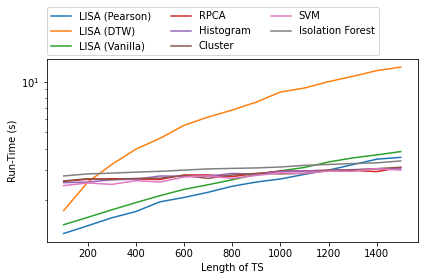

In [5]:
generate_timeit_line_chart(dimensions, scores)

In [3]:
dimension = np.array([200, 400, 600, 800, 1000])

lisa_pearson_results = np.array([1.42, 1.68, 2.01, 2.37, 2.73])
lisa_dtw_results = np.array([2.35, 3.7, 5.08, 6.37, 7.65])
lisa_spatial_results = np.array([1.54, 1.86, 2.21, 2.52, 2.88])

rpca_results = np.array([2.43, 2.5, 2.67, 2.64, 2.75])
histogram_results = np.array([2.35, 2.39, 2.48, 2.56, 2.7])
cluster_results = np.array([2.44, 2.48, 2.48, 2.66, 2.7])
svm_results = np.array([2.25, 2.34, 2.45, 2.48, 2.64])
isolation_results = np.array([2.65, 2.71, 2.79, 2.86, 2.94])

scores = [{ 'title' : 'LISA (Pearson)', 'scores' : lisa_pearson_results }, 
          { 'title' : 'LISA (DTW)', 'scores' : lisa_dtw_results }, 
          { 'title' : 'LISA (Vanilla)', 'scores' :  lisa_spatial_results }, 
          { 'title' : 'RPCA', 'scores' :  rpca_results }, 
          { 'title' : 'Histogram', 'scores' :  histogram_results }, 
          { 'title' : 'Cluster', 'scores' :  cluster_results }, 
          { 'title' : 'SVM', 'scores' :  svm_results }, 
          { 'title' : 'Isolation Forest', 'scores' :  isolation_results }
         ]

In [4]:
def generate_timeit_line_chart(dimension, scores):
    fig, ax = plt.subplots()
    
    for score in scores:
        title = score['title']
        results = score['scores']
        ax.plot(dimension, results, label=title)
    ax.set_ylabel('Run-Time (s)')
    ax.set_xlabel('Length of TS')
    ax.set_yscale('log')
    ax.legend(bbox_to_anchor=(0,1.02,1,0.2), loc="lower left", borderaxespad=0, ncol=3)
    
    fig.tight_layout()
    plt.show()

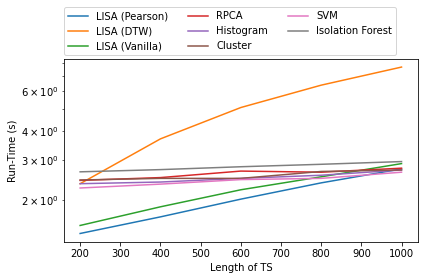

In [5]:
#PLOT
generate_timeit_line_chart(dimension, scores)
